In [6]:
import pandas as pd

# If you're uploading the file to Colab
from google.colab import files
uploaded = files.upload()

# Load the dataset (adjust filename if necessary)
df = pd.read_csv('/content/Quote-Equity-TATAMOTORS-EQ-21-10-2024-to-21-11-2024.csv')

# Show the first few rows of the dataset
df.head()


Saving Quote-Equity-TATAMOTORS-EQ-21-10-2024-to-21-11-2024.csv to Quote-Equity-TATAMOTORS-EQ-21-10-2024-to-21-11-2024 (2).csv


,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,19-Nov-2024,EQ,771.9,799.90,771.90,771.90,781.95,783.20,790.20,"1,179.00",670.7,"1,40,12,014","11,07,23,36,524.20","2,79,101"
1,18-Nov-2024,EQ,778.0,781.75,759.20,774.30,772.50,771.90,770.60,"1,179.00",670.7,"1,70,53,446","13,14,13,59,276.30","4,19,815"
2,14-Nov-2024,EQ,786.6,792.00,772.00,786.25,776.00,774.30,779.43,"1,179.00",649.3,"1,17,40,909","9,15,12,58,844.20","3,13,693"
3,13-Nov-2024,EQ,787.0,792.65,775.55,784.85,786.85,786.25,785.62,"1,179.00",649.3,"1,46,74,022","11,52,82,10,756.95","3,91,032"
4,12-Nov-2024,EQ,806.0,813.10,783.05,804.70,784.75,784.85,792.60,"1,179.00",649.3,"1,65,26,921","13,09,92,59,115.85","5,94,079"


Index(['Date', 'series', 'OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'close',
       'vwap', '52W H', '52W L', 'VOLUME', 'VALUE', 'No of trades'],
      dtype='object')


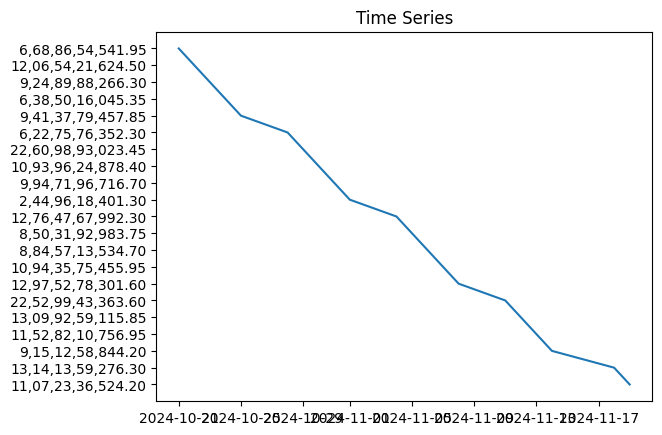

In [8]:
# Load the dataset
df = pd.read_csv('/content/Quote-Equity-TATAMOTORS-EQ-21-10-2024-to-21-11-2024.csv')

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Check the column names
print(df.columns)

# Rename the 'Timestamp' column to 'Date' (if necessary)
df.rename(columns={'Timestamp': 'Date'}, inplace=True)

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Now you can plot and proceed with the analysis
plt.plot(df['VALUE'])  # Replace 'Value' with your column of interest
plt.title('Time Series')
plt.show()


In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Quote-Equity-TATAMOTORS-EQ-21-10-2024-to-21-11-2024.csv')

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Check the column names
print(df.columns)

# Rename the 'Timestamp' column to 'Date' (if necessary)
df.rename(columns={'Timestamp': 'Date'}, inplace=True)

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Convert 'VALUE' column to numeric, handling commas
df['VALUE'] = pd.to_numeric(df['VALUE'].str.replace(',', ''), errors='coerce')
# errors='coerce' will replace invalid values with NaN

# Check for missing values
#df.isnull().sum()

# Handling missing values (example: fill with the mean)
df['VALUE'].fillna(df['VALUE'].mean(), inplace=True)


Index(['Date', 'series', 'OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'close',
       'vwap', '52W H', '52W L', 'VOLUME', 'VALUE', 'No of trades'],
      dtype='object')


<ipython-input-9-b16b22e8ff23>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['VALUE'].fillna(df['VALUE'].mean(), inplace=True)


In [10]:
mean = df['VALUE'].mean()
std_dev = df['VALUE'].std()
variance = df['VALUE'].var()

print(f"Mean: {mean}, Standard Deviation: {std_dev}, Variance: {variance}")


Mean: 10977650736.071428, Standard Deviation: 4700572050.8487625, Variance: 2.209537760522054e+19


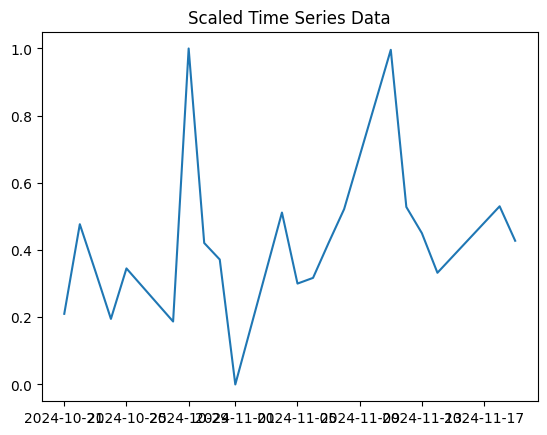

In [11]:
# Scaling example using MinMaxScaler (if necessary)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Scaled_VALUE'] = scaler.fit_transform(df[['VALUE']])

# Plot the scaled values
plt.plot(df['Scaled_VALUE'])
plt.title('Scaled Time Series Data')
plt.show()


<Figure size 1200x600 with 0 Axes>

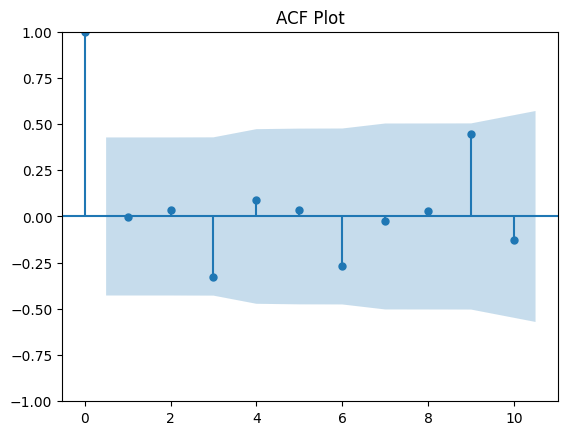

<Figure size 1200x600 with 0 Axes>

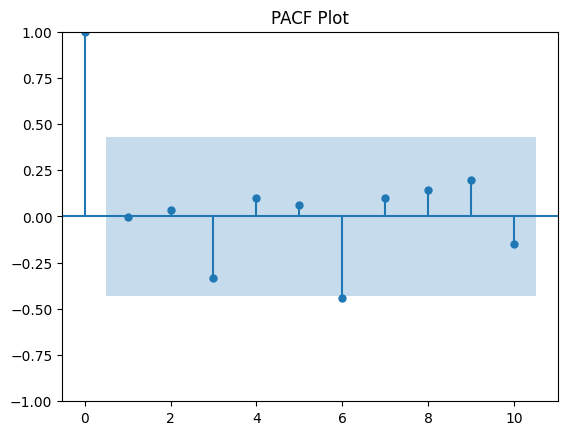

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot
plt.figure(figsize=(12,6))
# Calculate maximum allowable lags
max_lags = len(df) // 2
plot_acf(df['VALUE'], lags=max_lags)
plt.title('ACF Plot')
plt.show()

# PACF plot
plt.figure(figsize=(12,6))
# Use the calculated maximum lags for PACF as well
plot_pacf(df['VALUE'], lags=max_lags)
plt.title('PACF Plot')
plt.show()

In [13]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model (example: ARIMA(1, 0, 3))
model = ARIMA(df['VALUE'], order=(1,0,3))
fitted_model = model.fit()

# Show the summary of the fitted model
print(fitted_model.summary())


                               SARIMAX Results                                
Dep. Variable:                  VALUE   No. Observations:                   21
Model:                 ARIMA(1, 0, 3)   Log Likelihood                -494.964
Date:                Thu, 21 Nov 2024   AIC                           1001.927
Time:                        11:09:42   BIC                           1008.195
Sample:                             0   HQIC                          1003.288
                                 - 21                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.098e+10   6.22e-10   1.77e+19      0.000     1.1e+10     1.1e+10
ar.L1          0.2264      0.722      0.314      0.754      -1.188       1.641
ma.L1         -0.2178      0.658     -0.331      0.7

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

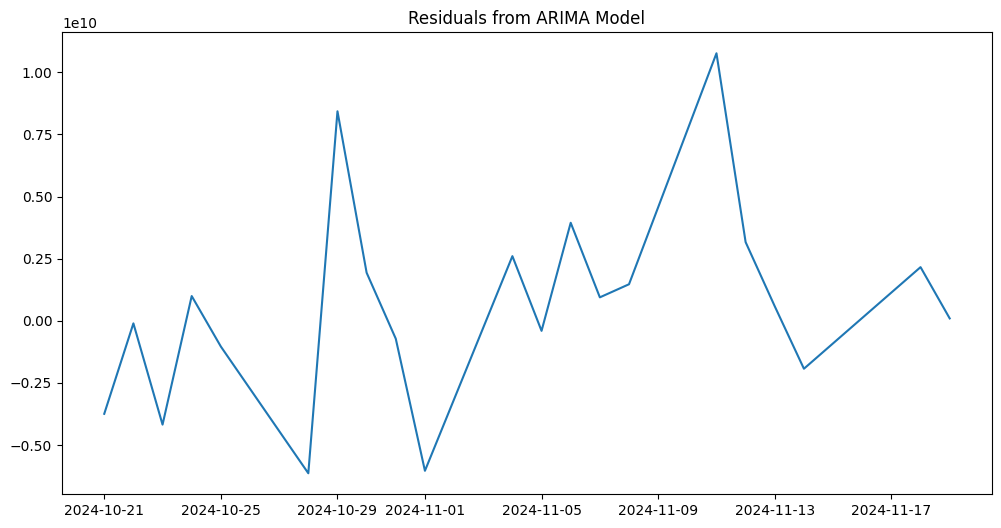

     lb_stat  lb_pvalue
10  10.88296   0.366709


In [14]:
# Plot the residuals
residuals = fitted_model.resid
plt.figure(figsize=(12,6))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.show()

# Perform a statistical test (Ljung-Box test) for autocorrelation in residuals
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(ljung_box)


<Figure size 1200x600 with 0 Axes>

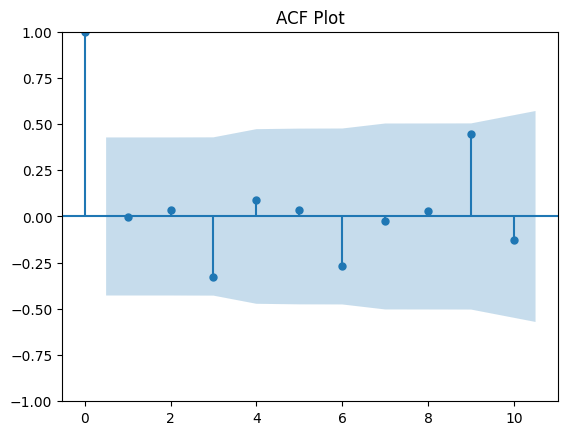

<Figure size 1200x600 with 0 Axes>

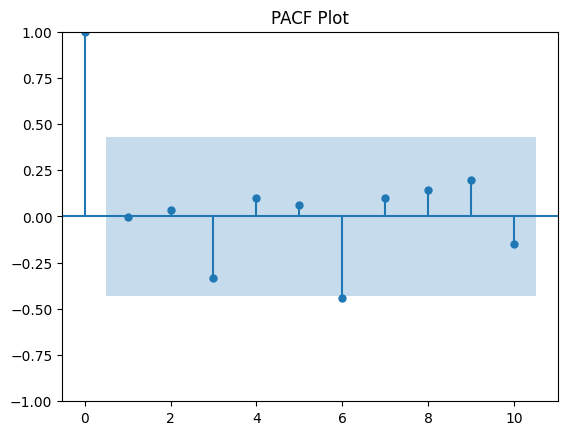

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [15]:
# Cell 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Cell 2: Load and preprocess your data (replace with your actual data loading)
# Assuming you have your data in a pandas DataFrame called 'df' and a test set 'df_test'
# df = pd.read_csv('your_data.csv', index_col='Date')  # Example data loading
# ... (Data preprocessing steps) ...

# Cell 3: Scale your data (if necessary)
scaler = MinMaxScaler()
df['Scaled_VALUE'] = scaler.fit_transform(df[['VALUE']])

# Cell 4: Plot ACF and PACF
plt.figure(figsize=(12,6))
max_lags = len(df) // 2
plot_acf(df['VALUE'], lags=max_lags)
plt.title('ACF Plot')
plt.show()

plt.figure(figsize=(12,6))
plot_pacf(df['VALUE'], lags=max_lags)
plt.title('PACF Plot')
plt.show()

# Cell 5: Fit the ARIMA model
model = ARIMA(df['VALUE'], order=(1,0,3))  # Example ARIMA order
fitted_model = model.fit()


In [16]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'df' is your original DataFrame
# Split data into train and test sets (e.g., 80% train, 20% test)
train_size = int(len(df) * 0.8)
df, df_test = df[0:train_size], df[train_size:len(df)]

# Fit the ARIMA model using the training data (df)
# ... (Your existing code for fitting the ARIMA model) ...

# Make predictions on the test set (df_test)
predictions = fitted_model.predict(start=len(df), end=len(df)+len(df_test)-1, dynamic=False)

# Calculate and print RMSE
rmse = np.sqrt(mean_squared_error(df_test['VALUE'], predictions)) # Access 'VALUE' column of df_test
print(f"RMSE: {rmse}")

RMSE: 2591839394.127877
